# Impact of Covid-19 on Unemployment Rates in India

In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [561]:
df=pd.read_csv("D://abhijith//internship1//DATASETS//Unemployment in India.csv")
print(df.columns)
print(df.shape)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
(740, 7)


In [562]:
print(df.duplicated().sum())
df.drop_duplicates()
# print(df.isnull().sum(),"\n")
print(df.nunique())

0
Region                                       28
 Date                                        14
 Frequency                                    2
 Estimated Unemployment Rate (%)            624
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    626
Area                                          2
dtype: int64


In [563]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [564]:
print(df[' Date'].head())

0     31-05-2019
1     30-06-2019
2     31-07-2019
3     31-08-2019
4     30-09-2019
Name:  Date, dtype: object


# Unemployment Rate By Region

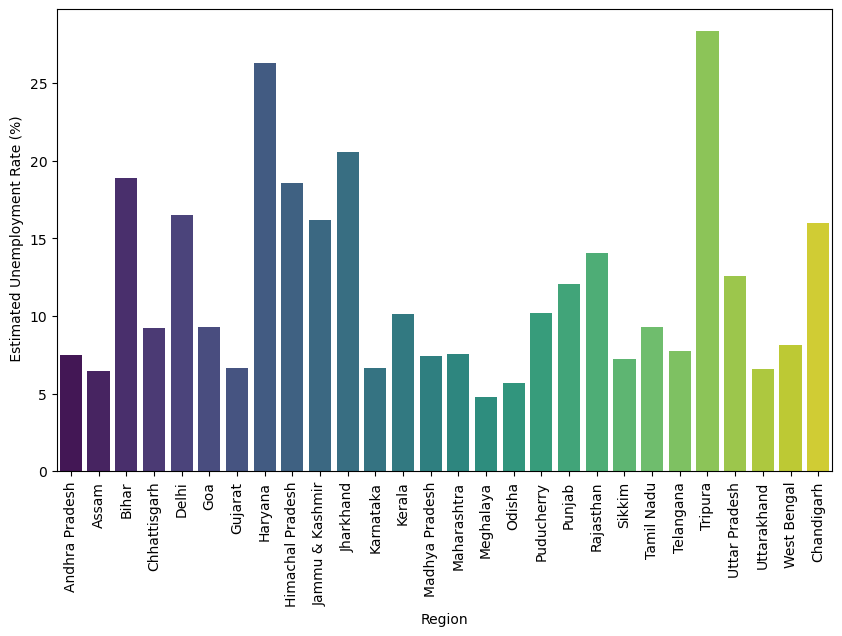

In [565]:

plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Region',y=' Estimated Unemployment Rate (%)',hue='Region',errorbar=None,palette='viridis')
plt.xticks(rotation=90)
plt.show()

# Heatmap Estimated Unemployment Rate over different regions

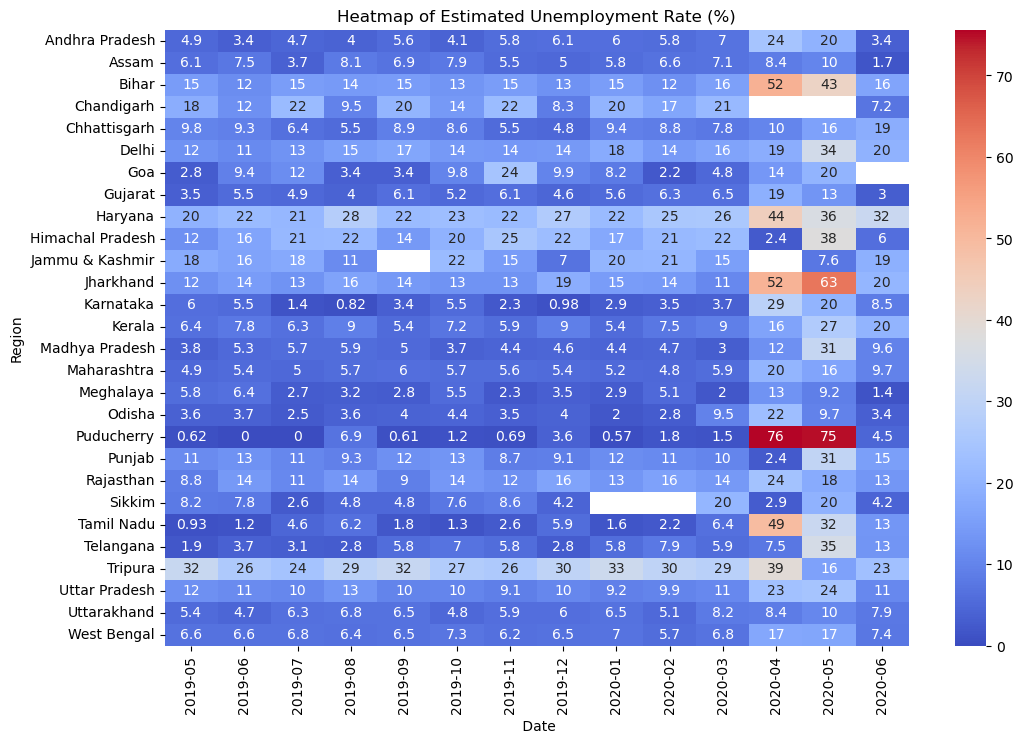

In [566]:
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)
df[' Date'] = df[' Date'].dt.strftime('%Y-%m')
pivot_table = df.pivot_table(values=' Estimated Unemployment Rate (%)', index='Region', columns=' Date')

plt.figure(figsize=(12, 8)) 
sns.heatmap(pivot_table, cmap='coolwarm', annot=True) 
plt.title('Heatmap of Estimated Unemployment Rate (%)')
plt.title('Heatmap of Estimated Unemployment Rate (%)') 
plt.show()

# Correlation Heatmap

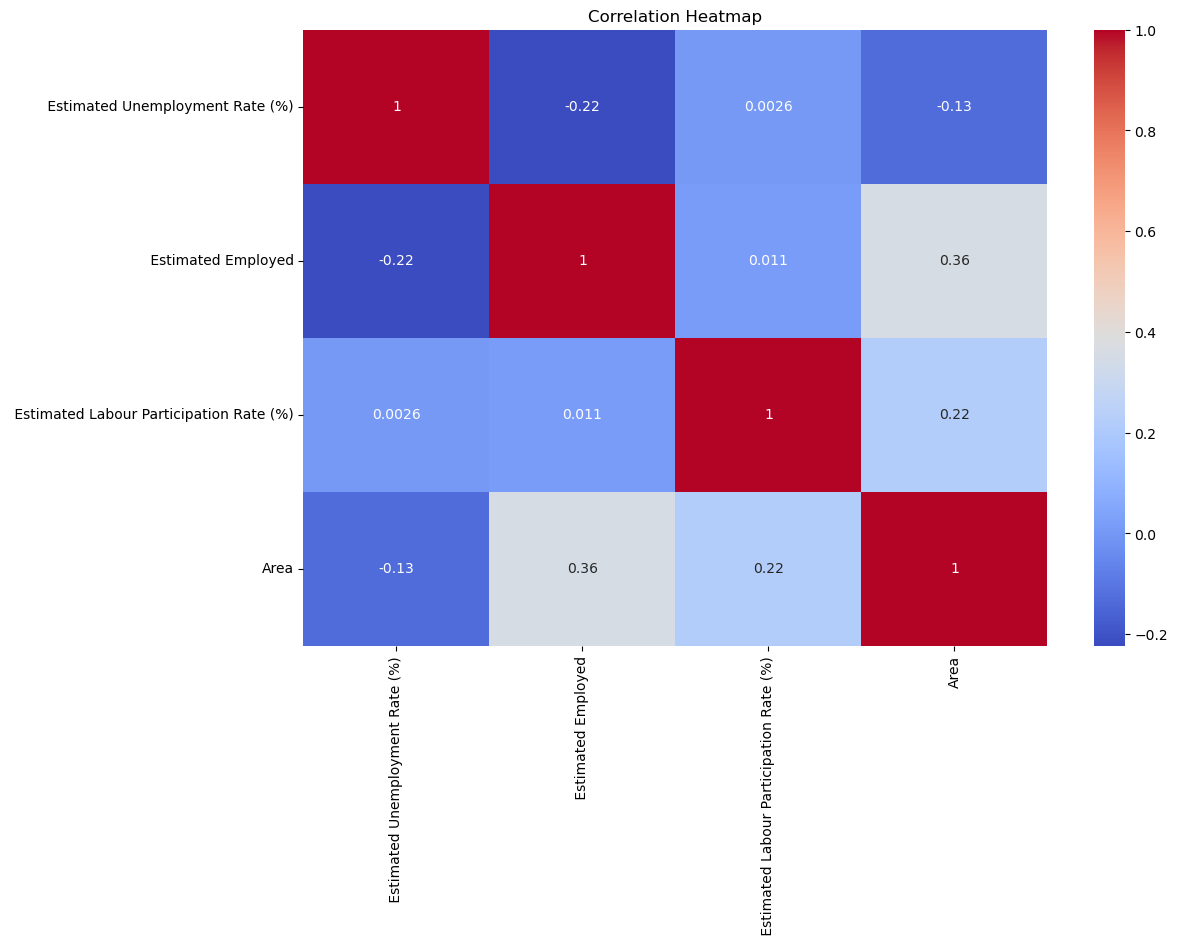

In [567]:
d=df
d['Area'] = (d['Area'] == "Rural").astype(int)
num_df = d.select_dtypes(include=['number'])
cm=num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

<!-- 'Unemployment Rate over Time in Urban and Rural Areas -->

# Unemployment Rate over Time in Urban and Rural Areas

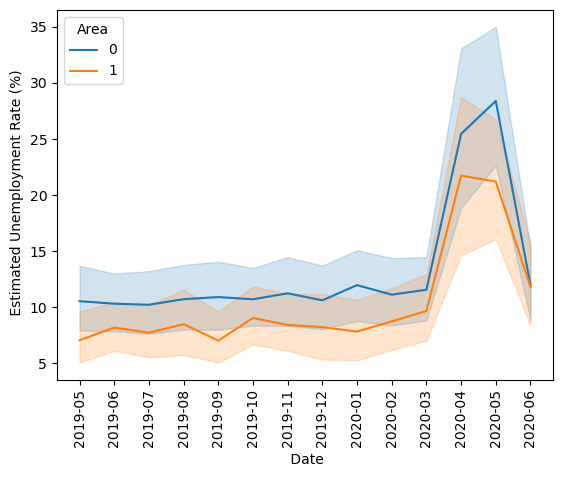

In [568]:

sns.lineplot(data=df,x=" Date", y=" Estimated Unemployment Rate (%)",hue="Area")
plt.xticks(rotation=90)
# plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

# Urban vs Rural: Unemployment & Labour Participation Rates

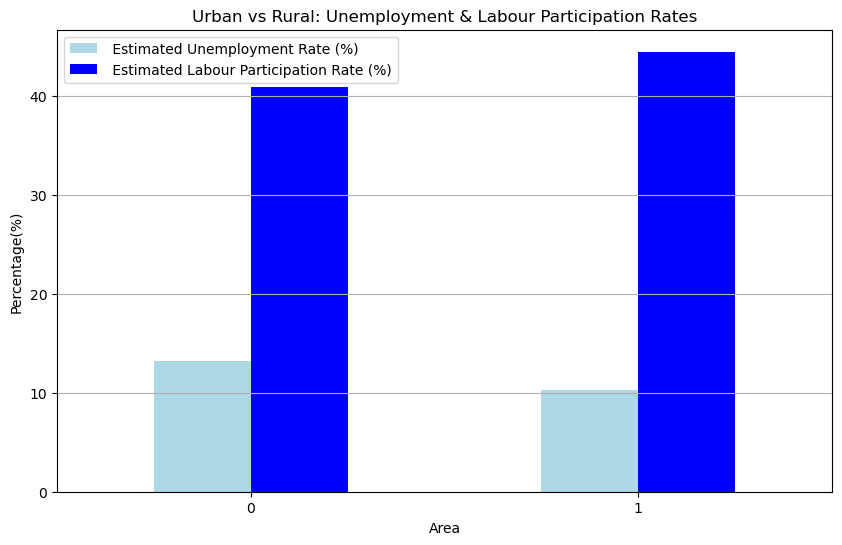

In [569]:

area_analysis = df.groupby('Area')[[' Estimated Unemployment Rate (%)', ' Estimated Labour Participation Rate (%)']].mean()

# Plotting grouped bar plot
area_analysis.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'blue'])
plt.title('Urban vs Rural: Unemployment & Labour Participation Rates')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=360)
plt.grid(axis="y")
plt.show()